## Projet:
Analyse de l'adoption des Fintechs et de l'inclusion financière en Afrique.

**Objectif** : Analyser les dynamiques d’adoption des services fintechs en Afrique et identifier les facteurs favorisant ou freinant l'inclusion financière.

**Contexte** : Croissance des fintechs en Afrique comme alternative ou complément aux banques traditionnelles.

**Jeu de données** : Données fictives ou ouvertes contenant des informations sur l’usage des fintechs, réparties par pays, âge, année, etc.

## Importation des packages.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import skew, kurtosis

## Chargement  et aperçu du jeu de données.

In [2]:
# Chargement  et lecture des données
df=pd.read_csv("startup_data.csv")
df

,Startup Name,Industry,Funding Rounds,Funding Amount (M USD),Valuation (M USD),Revenue (M USD),Employees,Market Share (%),Profitable,Year Founded,Region,Exit Status
0,Startup_1,IoT,1,101.09,844.75,67.87,1468,5.20,0,2006,Europe,Private
1,Startup_2,EdTech,1,247.62,3310.83,75.65,3280,8.10,1,2003,South America,Private
2,Startup_3,EdTech,1,109.24,1059.37,84.21,4933,2.61,1,1995,South America,Private
3,Startup_4,Gaming,5,10.75,101.90,47.08,1059,2.53,0,2003,South America,Private
4,Startup_5,IoT,4,249.28,850.11,50.25,1905,4.09,0,1997,Europe,Acquired
...,...,...,...,...,...,...,...,...,...,...,...,...
495,Startup_496,EdTech,2,181.86,2378.65,59.64,3331,0.58,1,1993,Europe,Private
496,Startup_497,AI,2,107.34,1394.58,10.22,2223,5.85,0,2019,South America,Private
497,Startup_498,E-Commerce,1,160.29,502.09,84.73,2222,4.32,0,2019,Australia,Private
498,Startup_499,Gaming,5,234.65,2814.52,53.16,4972,5.53,0,2011,Europe,Private


In [3]:
# Dimension du dataset
print("Dimensions du dataset:", df.shape)

Dimensions du dataset: (500, 12)


In [4]:
# Information sur le hjeu de données
print("Information du dataset:", df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Startup Name            500 non-null    object 
 1   Industry                500 non-null    object 
 2   Funding Rounds          500 non-null    int64  
 3   Funding Amount (M USD)  500 non-null    float64
 4   Valuation (M USD)       500 non-null    float64
 5   Revenue (M USD)         500 non-null    float64
 6   Employees               500 non-null    int64  
 7   Market Share (%)        500 non-null    float64
 8   Profitable              500 non-null    int64  
 9   Year Founded            500 non-null    int64  
 10  Region                  500 non-null    object 
 11  Exit Status             500 non-null    object 
dtypes: float64(4), int64(4), object(4)
memory usage: 47.0+ KB
Information du dataset: None


## Nettoyage des données

In [5]:
# Vérification du types des données
print("Types des données:", df.dtypes)

Types des données: Startup Name               object
Industry                   object
Funding Rounds              int64
Funding Amount (M USD)    float64
Valuation (M USD)         float64
Revenue (M USD)           float64
Employees                   int64
Market Share (%)          float64
Profitable                  int64
Year Founded                int64
Region                     object
Exit Status                object
dtype: object


In [6]:
# Vérification des valeurs manquantes
print("Valeurs manquantes dans le dataset: \n", df.isnull().sum())

Valeurs manquantes dans le dataset: 
 Startup Name              0
Industry                  0
Funding Rounds            0
Funding Amount (M USD)    0
Valuation (M USD)         0
Revenue (M USD)           0
Employees                 0
Market Share (%)          0
Profitable                0
Year Founded              0
Region                    0
Exit Status               0
dtype: int64


In [7]:
# Vérification des doublons
print("Nombre de doublons dans le dataset:", df.duplicated().sum())

Nombre de doublons dans le dataset: 0


Les données sont bien typées, il n'y a pas de valeurs manquantes et de doublons.Notre jeu de données est donc propere.
Nous pouvons passer à l'analyse exp;loratoire des données.

# Analyse exploratoire des données.

## Analyse descriptive globale.

In [8]:
# Statistiques descriptives 
df.describe()

,Funding Rounds,Funding Amount (M USD),Valuation (M USD),Revenue (M USD),Employees,Market Share (%),Profitable,Year Founded
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,2.958000,152.656760,1371.809180,49.321740,2532.092000,5.092940,0.432000,2006.044000
std,1.440968,86.683711,978.226579,29.267605,1385.434921,2.807646,0.495851,9.347128
min,1.000000,0.570000,2.430000,0.120000,12.000000,0.100000,0.000000,1990.000000
25%,2.000000,79.212500,557.027500,22.802500,1382.750000,2.760000,0.000000,1998.000000
50%,3.000000,156.005000,1222.580000,48.800000,2496.500000,5.135000,0.000000,2006.000000
75%,4.000000,226.450000,2052.085000,74.965000,3708.750000,7.552500,1.000000,2014.000000
max,5.000000,299.810000,4357.490000,99.710000,4984.000000,10.000000,1.000000,2022.000000


In [9]:
df

,Startup Name,Industry,Funding Rounds,Funding Amount (M USD),Valuation (M USD),Revenue (M USD),Employees,Market Share (%),Profitable,Year Founded,Region,Exit Status
0,Startup_1,IoT,1,101.09,844.75,67.87,1468,5.20,0,2006,Europe,Private
1,Startup_2,EdTech,1,247.62,3310.83,75.65,3280,8.10,1,2003,South America,Private
2,Startup_3,EdTech,1,109.24,1059.37,84.21,4933,2.61,1,1995,South America,Private
3,Startup_4,Gaming,5,10.75,101.90,47.08,1059,2.53,0,2003,South America,Private
4,Startup_5,IoT,4,249.28,850.11,50.25,1905,4.09,0,1997,Europe,Acquired
...,...,...,...,...,...,...,...,...,...,...,...,...
495,Startup_496,EdTech,2,181.86,2378.65,59.64,3331,0.58,1,1993,Europe,Private
496,Startup_497,AI,2,107.34,1394.58,10.22,2223,5.85,0,2019,South America,Private
497,Startup_498,E-Commerce,1,160.29,502.09,84.73,2222,4.32,0,2019,Australia,Private
498,Startup_499,Gaming,5,234.65,2814.52,53.16,4972,5.53,0,2011,Europe,Private


## Analyse descriptive univariée.

In [23]:
# Création des listes var_num et var_cat contenants respectivement les noms des variables numériques et catégorielles
var_num=["Funding Rounds","Funding Amount (M USD)",
         "Valuation (M USD)",
         "Revenue (M USD)","Employees", "Market Share (%)"
        ]
var_cat=["Region","Exit Status", "Industry", "Profitable"
         ]

### Analyse descriptive des variables numériques. 

#### Histogramme des variables numériques.

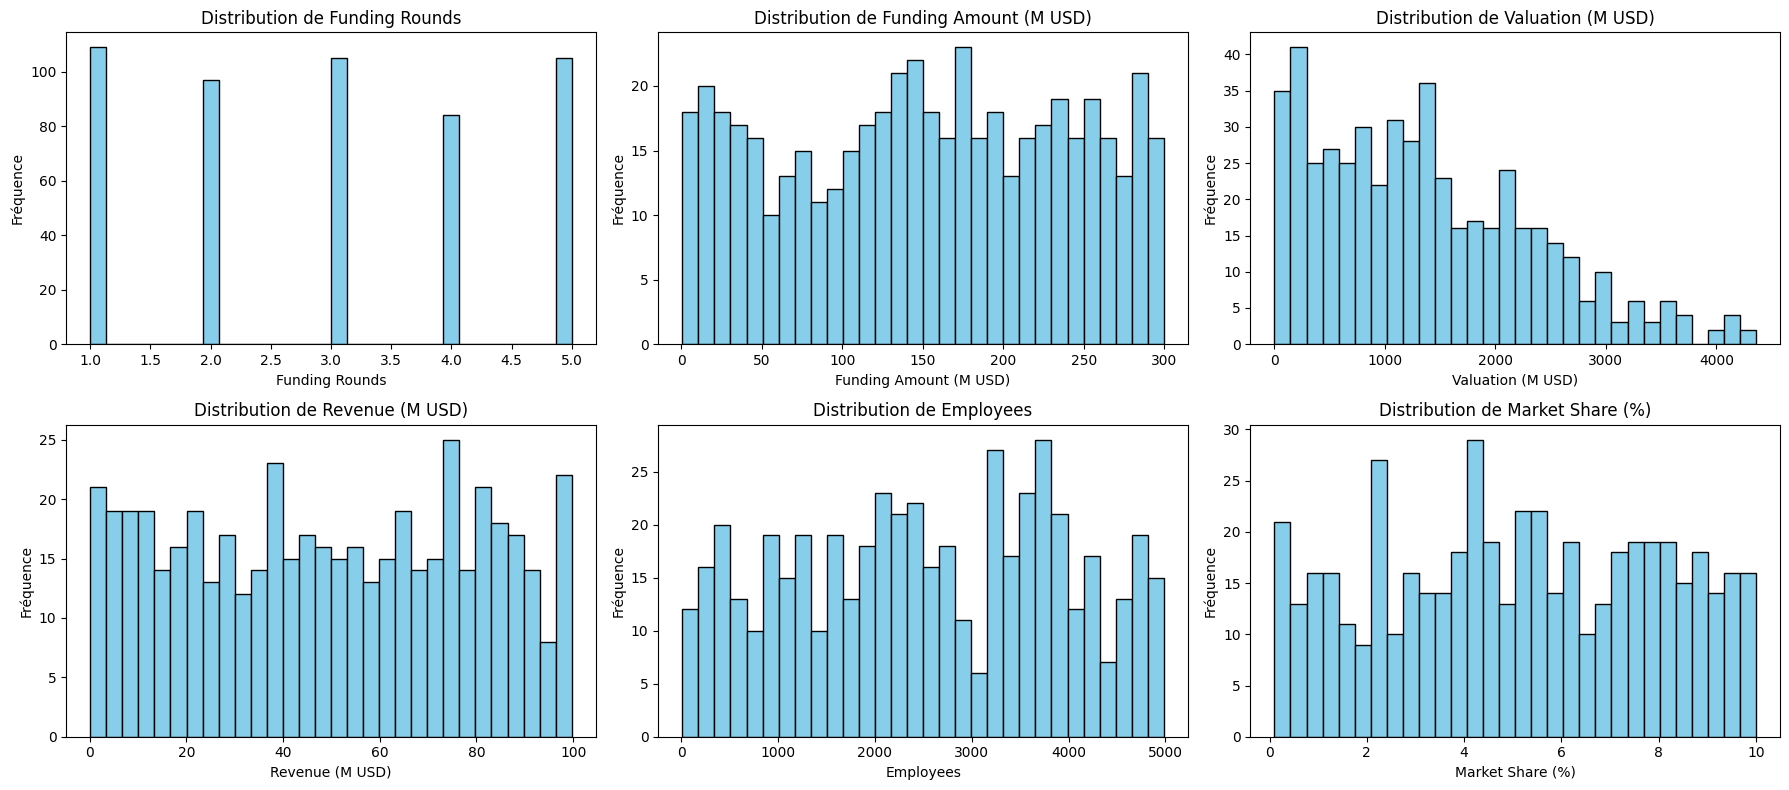

In [25]:
fig, axes = plt.subplots(2, 3, figsize=(18, 8))
# Aplatir les axes pour itérer facilement
axes = axes.flatten()
# Créer les histogrammes dans chaque sous-graphe
for i, var in enumerate(var_num):
    axes[i].hist(df[var], bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Distribution de {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Fréquence')

# Ajuster l’espacement entre les subplots
plt.tight_layout()
plt.show()

#### Interprétation graphique:
- L'histogramme de la distribution de toutes variables quantitatives montre que toutes les modalités des variables quantitatives ont des fréquences casi identiques. Cela suggère une distribution uniforme, où chaque valeur est également représentée dans les données.
- Cela informe sur les transformations potentielles (ex. : log) avant la modélisation.

### Boxplots (détection des valeurs extrêmes).

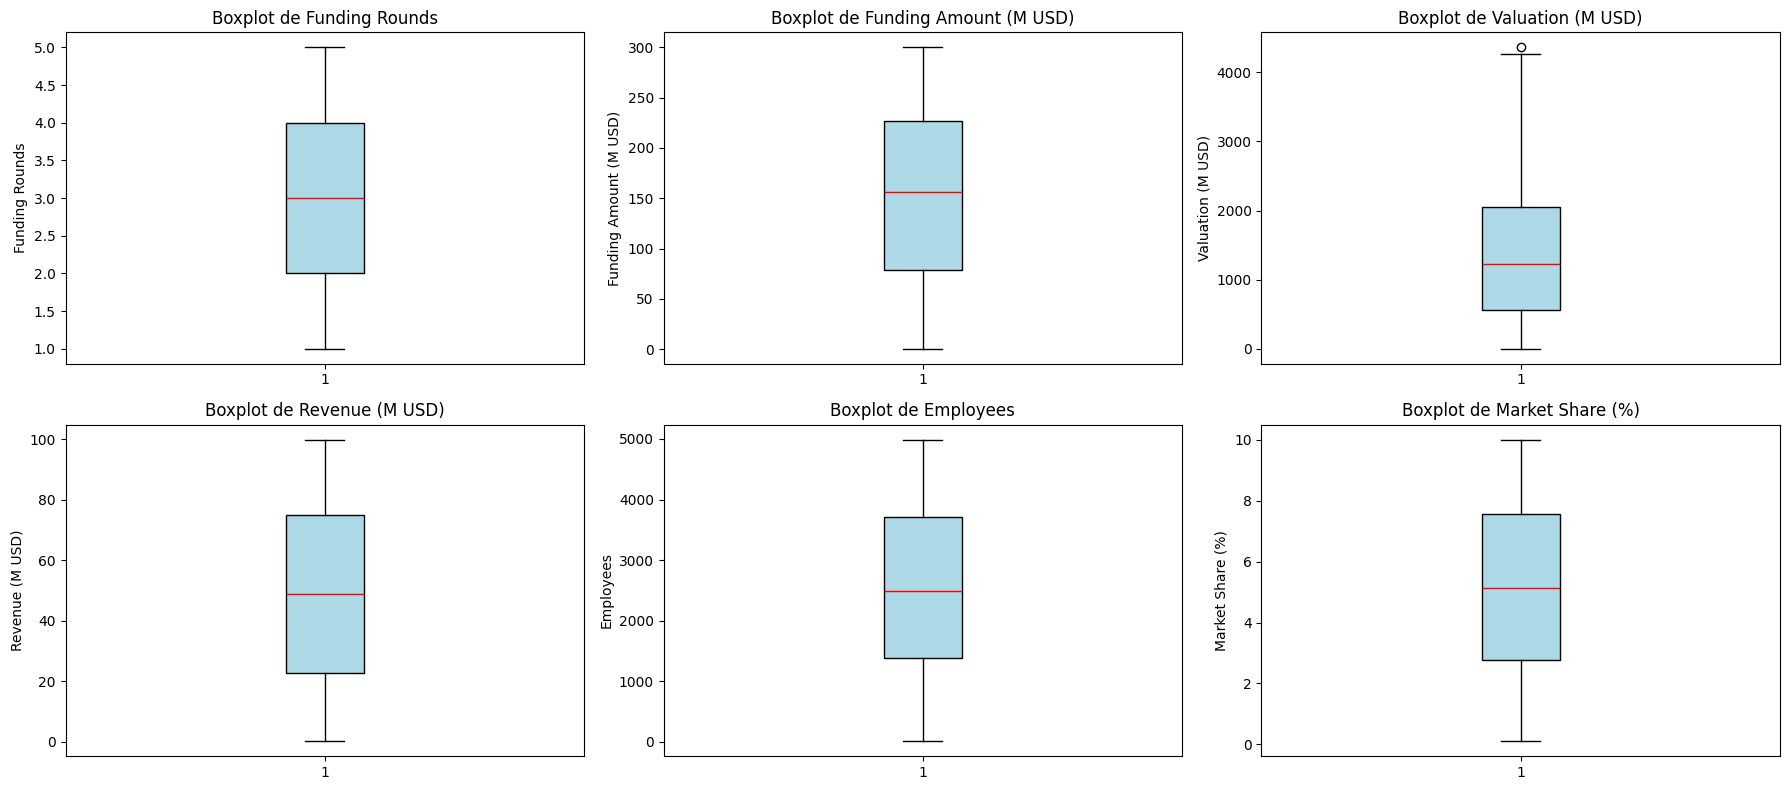

In [26]:
fig, axes = plt.subplots(2, 3, figsize=(18, 8))

# Aplatir les axes pour itérer facilement
axes = axes.flatten()

# Créer les boxplots dans chaque sous-graphe 
for i, var in enumerate(var_num):
    axes[i].boxplot(df[var].dropna(), vert=True, patch_artist=True,
                    boxprops=dict(facecolor='lightblue', color='black'),
                    medianprops=dict(color='red'))
    axes[i].set_title(f'Boxplot de {var}')
    axes[i].set_ylabel(var)

# Retirer les axes vides s’il y en a
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Ajuster l’espacement entre les subplots
plt.tight_layout()
plt.show()

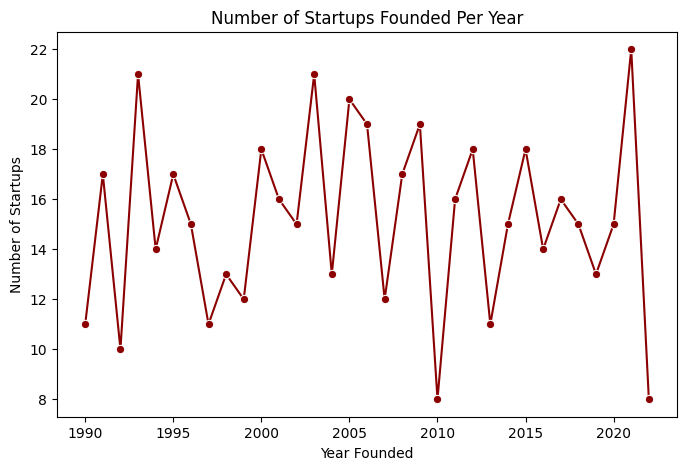

In [22]:
plt.figure(figsize=(8, 5))
startup_counts_per_year = df['Year Founded'].value_counts().sort_index()
sns.lineplot(x=startup_counts_per_year.index, y=startup_counts_per_year.values, marker='o', color='darkred')
plt.title('Number of Startups Founded Per Year')
plt.xlabel('Year Founded')
plt.ylabel('Number of Startups')
plt.show()

### Analyse descriptive des variables catégorielles.

#### Statistques globale.

In [17]:
df.describe(include='object')

,Startup Name,Industry,Region,Exit Status
count,500,500,500,500
unique,500,8,5,3
top,Startup_500,EdTech,Australia,Private
freq,1,74,108,348


#### Interprétation des résultats:
- **Pays**: Nous avons un total de 16 pays dans notre jeu de données et le Nigéria est la modalité la plus observée avec environ 663 observations.
- **Tranch_Age**: Au total nous avons 5 tranches d'age et la tranche d'age dominante est celle de 26-35 avec environ 2056 observations.
- **Type_Opération**: 3 types d'opérations sont possibles et le plus utilisé est le transfert avec 3359 observations.

- **Service_Fintech_Populaire**: Avec un total de 4 modalités, il est dominé par la crypto avec 2573 observations.

- **Frein_Adoption**: 4 éléments freinent l'adoption des Fintech, le principal est le manque de formation.

#### Diagrammes en barres (distribution des modalités).

C:\Users\HP 840 G3\AppData\Local\Temp\ipykernel_10776\478053069.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=order, palette='viridis', ax=axes[i])
C:\Users\HP 840 G3\AppData\Local\Temp\ipykernel_10776\478053069.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=order, palette='viridis', ax=axes[i])
C:\Users\HP 840 G3\AppData\Local\Temp\ipykernel_10776\478053069.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=order, palette='viridis', ax=axes[i])


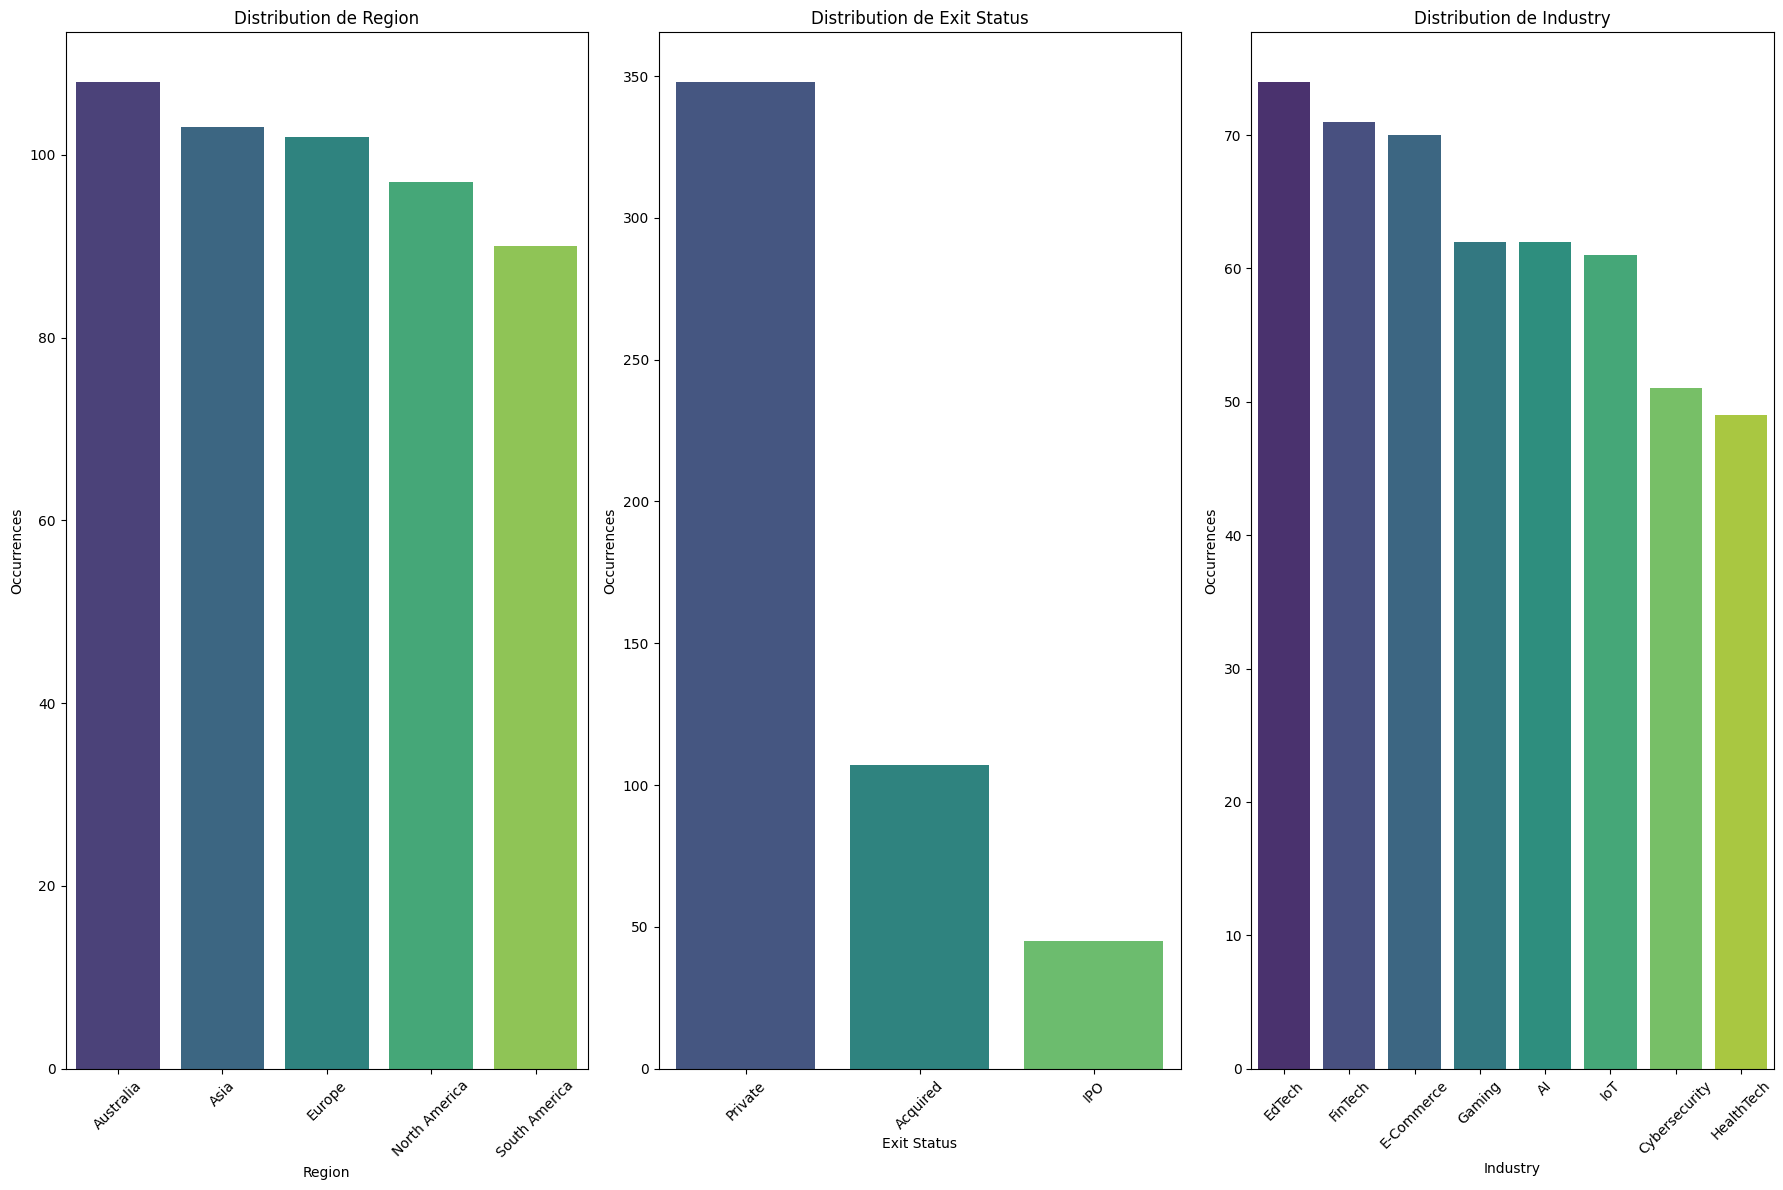

In [18]:
# Créer la grille de sous-graphiques
fig, axes = plt.subplots(1, 3, figsize=(18, 12))
#axes = axes.flatten()  # aplatir pour indexation simple

# Tracer chaque graphique dans un axe
for i, col in enumerate(var_cat):
    order = df[col].value_counts().index
    sns.countplot(data=df, x=col, order=order, palette='viridis', ax=axes[i])
    axes[i].set_title(f'Distribution de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Occurrences")
    axes[i].tick_params(axis='x', rotation=45)

# Supprimer les axes vides s’il y en a
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### Pourcentages des modalités de chaque varaibles catégorielles.

In [19]:
# Dictionnaire pour stocker les tableaux
percent_tables = {}
# Boucle pour créer un DataFrame par variable catégorielle
for col in var_cat:
    dist = (df[col].value_counts(normalize=True) * 100).round(2)
    table = dist.reset_index()
    table.columns = [col, 'Pourcentage (%)']
    percent_tables[col] = table

# Affichage des tableaux de pourcentages
for col, table in percent_tables.items():
    print(f"\n Répartition de la variable : {col}")
    display(table)


 Répartition de la variable : Region


,Region,Pourcentage (%)
0,Australia,21.6
1,Asia,20.6
2,Europe,20.4
3,North America,19.4
4,South America,18.0



 Répartition de la variable : Exit Status


,Exit Status,Pourcentage (%)
0,Private,69.6
1,Acquired,21.4
2,IPO,9.0



 Répartition de la variable : Industry


,Industry,Pourcentage (%)
0,EdTech,14.8
1,FinTech,14.2
2,E-Commerce,14.0
3,Gaming,12.4
4,AI,12.4
5,IoT,12.2
6,Cybersecurity,10.2
7,HealthTech,9.8


#### Interprétation des résultats:
L'analyse univariée montre que les différentes modalités des variables catégorielles sont quasiment uniformément réparties, avec des écarts inférieurs à 1 % entre les modalités. Ce type de distribution équilibrée suggère que :

- L'échantillon a été bien stratifié ou réparti équitablement entre les catégories ( pays, tranches d’âge, types d’opérations, Service_Fintech_Populaires, Frein_Adoption).
- Il n’y a pas de biais de représentation majeur en faveur d’une modalité spécifique, ce qui est favorable pour des analyses comparatives.
- Chaque groupe ou modalité dispose de suffisamment d'observations pour permettre des analyses fiables sans nécessité de correction ou de pondération.

Cela facilitera l’utilisation de ces variables dans des modèles prédictifs ou des analyses statistiques, notamment :
- Tests d’indépendance (chi²),
- Analyses multivariées (régression logistique, arbres de décision, etc.),
- Visualisations croisées.

## Analyse bivariée.

### Analyse des relations entre variables numériques. 

In [20]:
df.head(5)

,Startup Name,Industry,Funding Rounds,Funding Amount (M USD),Valuation (M USD),Revenue (M USD),Employees,Market Share (%),Profitable,Year Founded,Region,Exit Status
0,Startup_1,IoT,1,101.09,844.75,67.87,1468,5.20,0,2006,Europe,Private
1,Startup_2,EdTech,1,247.62,3310.83,75.65,3280,8.10,1,2003,South America,Private
2,Startup_3,EdTech,1,109.24,1059.37,84.21,4933,2.61,1,1995,South America,Private
3,Startup_4,Gaming,5,10.75,101.90,47.08,1059,2.53,0,2003,South America,Private
4,Startup_5,IoT,4,249.28,850.11,50.25,1905,4.09,0,1997,Europe,Acquired


#### Nombre_Utilisateurs VS Volume_Transactions.

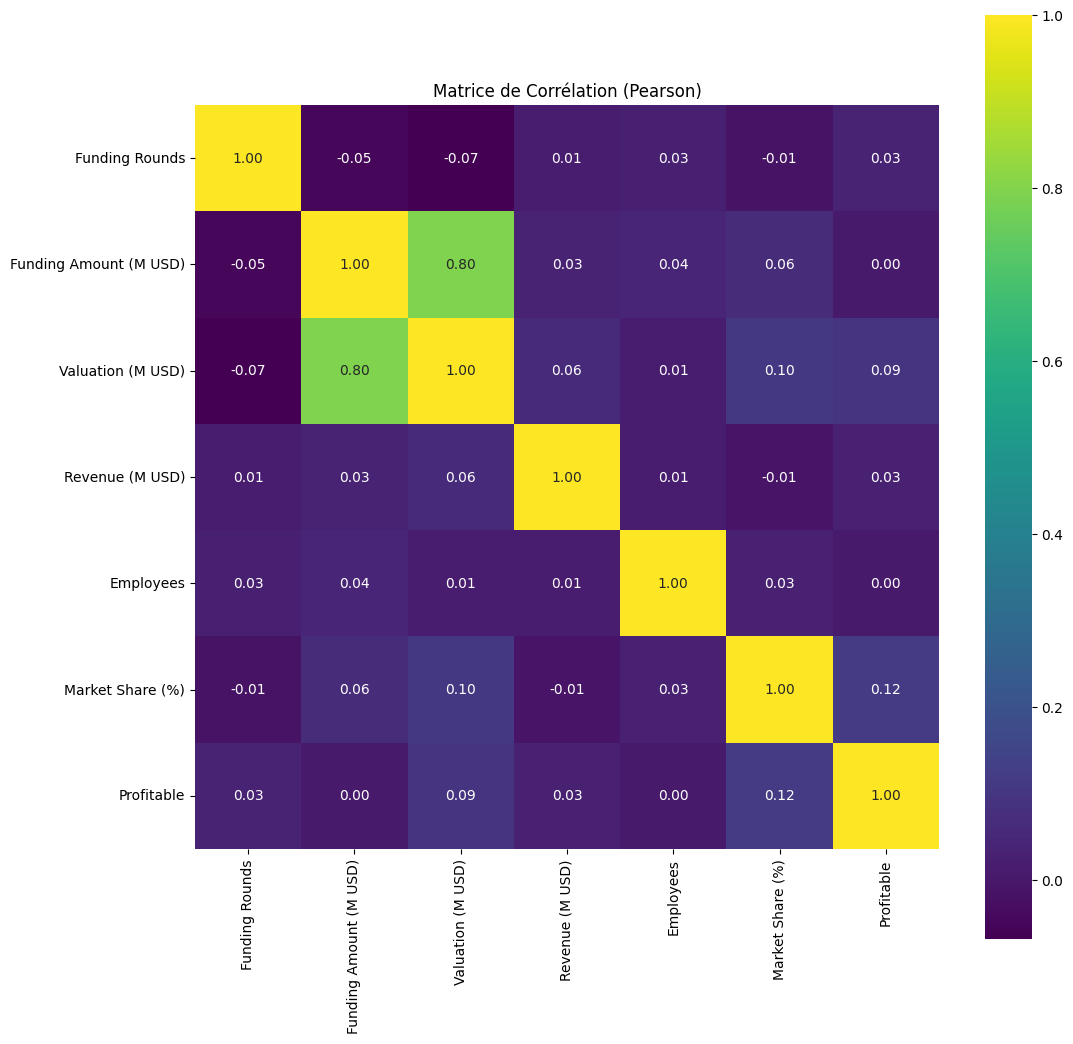

In [21]:
# Matrice de corrélation de Pearson
spearman_corr = df[var_num].corr()

# Affichage de la heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(spearman_corr, annot=True, fmt=".2f", cmap='viridis', square=True)
plt.title('Matrice de Corrélation (Pearson)')
plt.show()